<a href="https://colab.research.google.com/github/FathimaNazarudeen/s3./blob/main/b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
! /content/drive/MyDrive/autism

/bin/bash: /content/drive/MyDrive/autism: Is a directory


In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)


In [16]:
train_dir="/content/drive/MyDrive/fathima/train"
val_dir="/content/drive/MyDrive/fathima/valid"

In [17]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 2639 images belonging to 3 classes.
Found 100 images belonging to 2 classes.


In [18]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(10,3,activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2,activation="softmax")])

In [19]:
model_1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 dropout_1 (Dropout)         (None, 222, 222, 10)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

In [22]:
model=model_1.fit(train_data,epochs=100,validation_data=valid_data,steps_per_epoch=50,callbacks=[callback])

Epoch 1/100
50/50 [==============================] - 45s 712ms/step - loss: 1.9152 - accuracy: 0.5000 - val_loss: 0.6869 - val_accuracy: 0.6300
Epoch 2/100
50/50 [==============================] - 7s 152ms/step - loss: 0.7780 - accuracy: 0.4400 - val_loss: 0.7055 - val_accuracy: 0.5000
Epoch 3/100
50/50 [==============================] - 8s 160ms/step - loss: 0.6932 - accuracy: 0.6000 - val_loss: 0.7054 - val_accuracy: 0.5000
Epoch 4/100
50/50 [==============================] - 7s 140ms/step - loss: 0.7114 - accuracy: 0.4800 - val_loss: 0.6968 - val_accuracy: 0.4200
Epoch 5/100
50/50 [==============================] - 6s 126ms/step - loss: 0.7075 - accuracy: 0.4800 - val_loss: 0.6924 - val_accuracy: 0.5200
Epoch 6/100
50/50 [==============================] - 9s 167ms/step - loss: 0.7011 - accuracy: 0.5600 - val_loss: 0.6944 - val_accuracy: 0.4800
Epoch 7/100
50/50 [==============================] - 7s 129ms/step - loss: 0.7040 - accuracy: 0.4200 - val_loss: 0.6947 - val_accuracy: 0.490

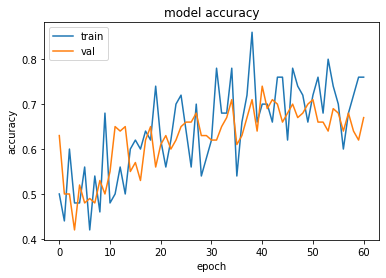

In [23]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

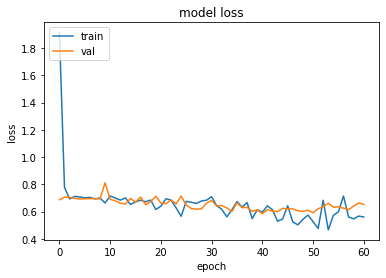

In [24]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
from tensorflow.keras.preprocessing import image

In [26]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[1. 0.]]":
    plt.xlabel("autism",fontsize=30)
  elif val=="[[0. 1.]]":
    plt.xlabel("not autism",fontsize=30)


1/1 [==============================] - 0s 95ms/step
[[1. 0.]]


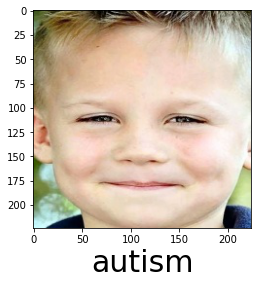

In [27]:
predictImage("/content/drive/MyDrive/autism/Autism/test/non_autistic/005.jpg")

In [29]:
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

In [30]:
AlexNet.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [31]:
history_2=AlexNet.fit(train_data,
                      epochs=100,
                      
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/100
2639/2639 [==============================] - 147s 55ms/step - loss: 2.5190 - accuracy: 0.5476 - val_loss: 0.8168 - val_accuracy: 0.7300
Epoch 2/100
2639/2639 [==============================] - 33s 12ms/step - loss: 0.9328 - accuracy: 0.6074 - val_loss: 0.7826 - val_accuracy: 0.7000
Epoch 3/100
2639/2639 [==============================] - 33s 12ms/step - loss: 0.8519 - accuracy: 0.6055 - val_loss: 0.7373 - val_accuracy: 0.6500
Epoch 4/100
2639/2639 [==============================] - 33s 12ms/step - loss: 0.7827 - accuracy: 0.6472 - val_loss: 0.8131 - val_accuracy: 0.6400
Epoch 5/100
2639/2639 [==============================] - 33s 12ms/step - loss: 0.7382 - accuracy: 0.6688 - val_loss: 0.8582 - val_accuracy: 0.6000
Epoch 6/100
2639/2639 [==============================] - 33s 13ms/step - loss: 0.7152 - accuracy: 0.6950 - val_loss: 0.8015 - val_accuracy: 0.5900
Epoch 7/100
2639/2639 [==============================] - 34s 13ms/step - loss: 0.6831 - accuracy: 0.7071 - val_loss: 

In [32]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=AlexNet.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[0. 1.]]":
    plt.xlabel("autism",fontsize=30)
  elif val=="[[1. 0.]]":
    plt.xlabel("not autism",fontsize=30)


1/1 [==============================] - 0s 155ms/step
[[1. 0.]]


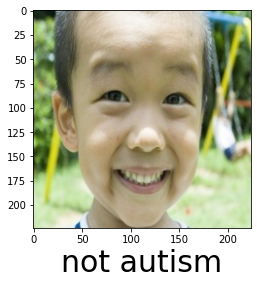

In [33]:
predictImage("/content/drive/MyDrive/autism/Autism/test/non_autistic/008.jpg")